# Diffusion-limited aggregation

# (a)

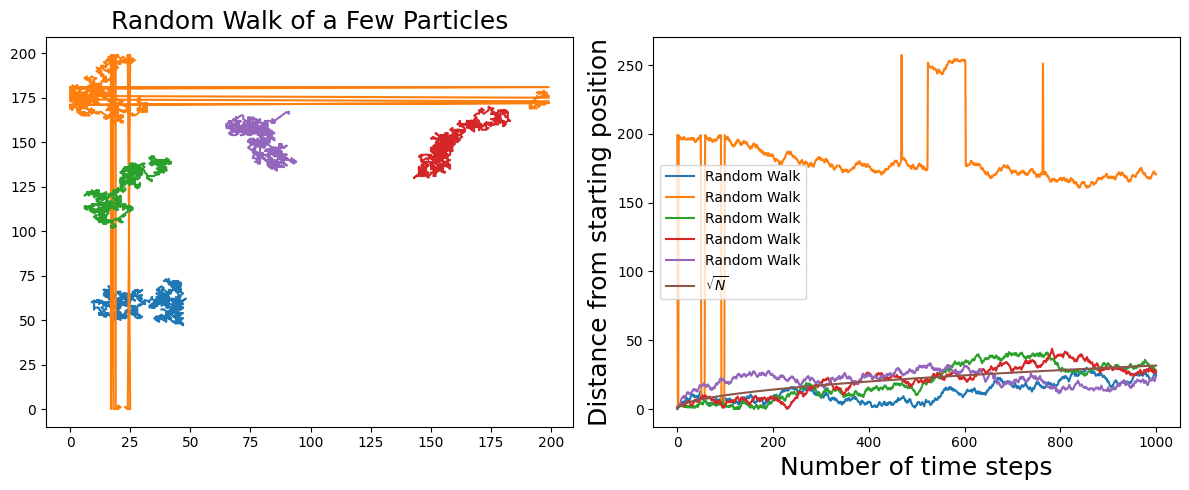

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import random

def RandomWalk():
    # Create n x n array of liquid particles, only 1 so we can map trajectory
    liq_pos = np.zeros((200,200), dtype=int)
    for n in range(1):
        i = random.randint(0,199)
        j = random.randint(0,199)
        val = 1
        liq_pos[i,j] = liq_pos[i,j] + val


    init_pos = np.where(liq_pos==1)
    init_pos_x = init_pos[0][0]
    init_pos_y = init_pos[1][0]

    counter = 0 
    time_steps = 1000

    x = np.zeros(time_steps)
    y = np.zeros(time_steps)
    dx = np.zeros(time_steps)
    dy = np.zeros(time_steps)
    while counter < time_steps:

        # Randomly move liquid particles to adjacent position
        indices = np.where(liq_pos>=1)
        vals = liq_pos[indices]
        i_idx = indices[0]
        j_idx = indices[1]

        for val_pos, val in enumerate(vals):
            new_i_indices_arr = np.zeros(val, dtype=int)
            new_j_indices_arr = np.zeros(val, dtype=int)

            for num_vals in range(val):
                i_new = i_idx[val_pos] + random.randint(-1,1)
                j_new = j_idx[val_pos] + random.randint(-1,1)
                new_i_indices_arr[num_vals] = i_new
                new_j_indices_arr[num_vals] = j_new

            i_idx[val_pos] = new_i_indices_arr[0]
            j_idx[val_pos] = new_j_indices_arr[0]
            vals[val_pos] = 1

    
        
        # Boundary conditions
        i_idx[i_idx>=200] = 0
        j_idx[j_idx>=200] = 0
        i_idx[i_idx<=-1] = 199
        j_idx[j_idx<=-1] = 199

        # Recreate liquid array with new positions
        liq_pos = np.zeros((200,200), dtype=int)
        for n in range(len(vals)):
            liq_pos[i_idx[n],j_idx[n]] = liq_pos[i_idx[n],j_idx[n]] + vals[n] 

        # Finding where particle is compared to where it was
        new_pos = np.where(liq_pos==1)
        pos_x = new_pos[0][0]
        pos_y = new_pos[1][0]
        dx[counter] = np.abs(init_pos_x - pos_x)
        dy[counter] = np.abs(init_pos_y - pos_y)
        x[counter] = pos_x
        y[counter] = pos_y
        counter += 1


    distance = np.sqrt(np.square(dx) + np.square(dy))
    return distance, x, y



time_steps = 1000
time = np.linspace(0, time_steps, time_steps)

plt.figure(figsize=(12, 5))

for i in range(5):
    distance, x, y = RandomWalk()

    plt.subplot(121)
    plt.plot(x, y)
    plt.title('Random Walk of a Few Particles', fontsize=18)

    plt.subplot(122)
    plt.plot(time, distance, label='Random Walk')
    
plt.subplot(122)
plt.plot(time, np.sqrt(time), label='$\sqrt{N}$')
plt.ylabel('Distance from starting position', fontsize=18)
plt.xlabel('Number of time steps', fontsize=18)
plt.legend()

plt.tight_layout()
plt.show()







# We can see from the first plot that the particles are definitely following a random path. Some look strange because of the periodic boundary conditions, they are being teleported to the other side of the array. For the second plot, we see that the particles who were affected by the boundary condition don't follow the $\sqrt{N}$ dependence one would expect for a random walk, because the distance is being changed drastically by the teleportation. Otherwise, the other particles do follow the $\sqrt{N}$ trend.

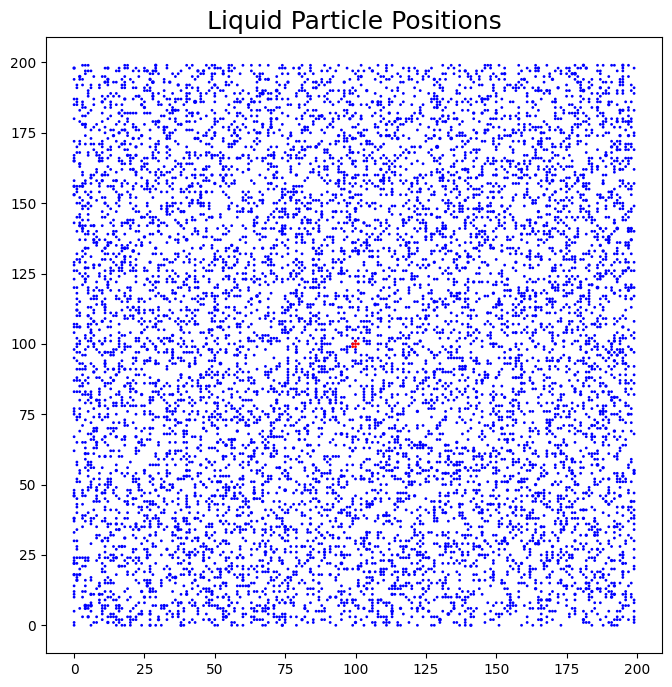

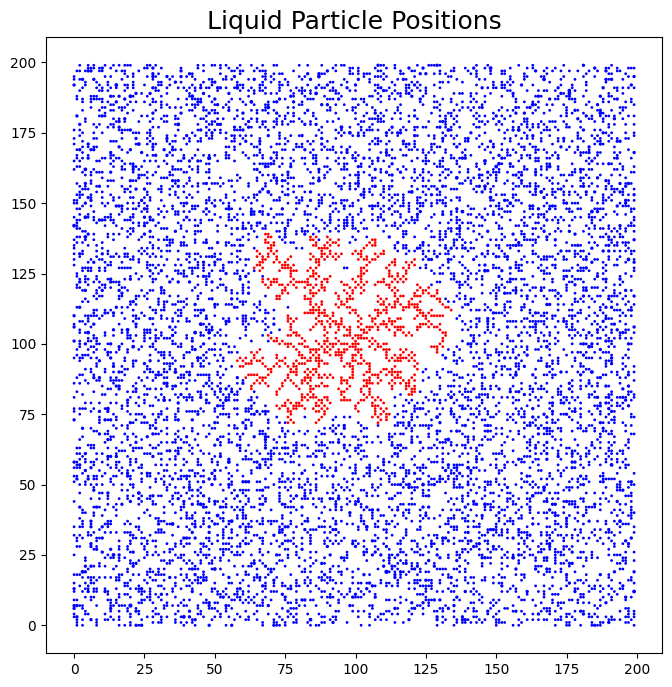

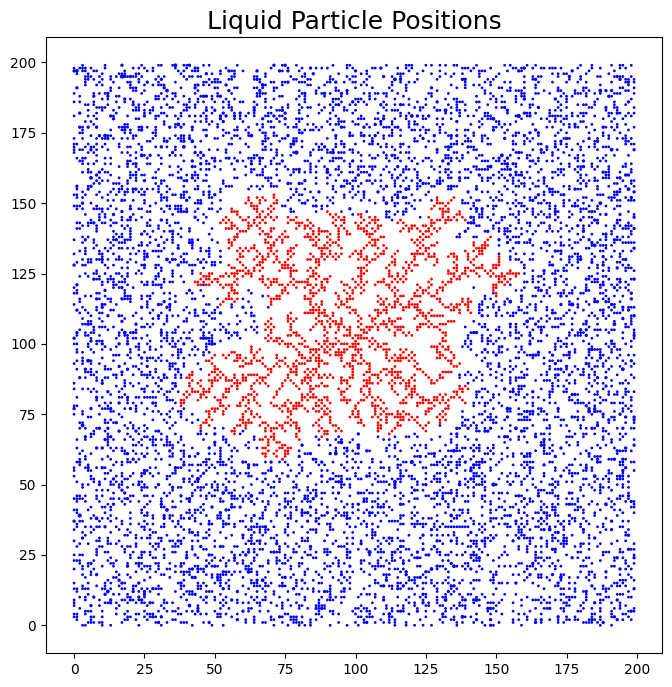

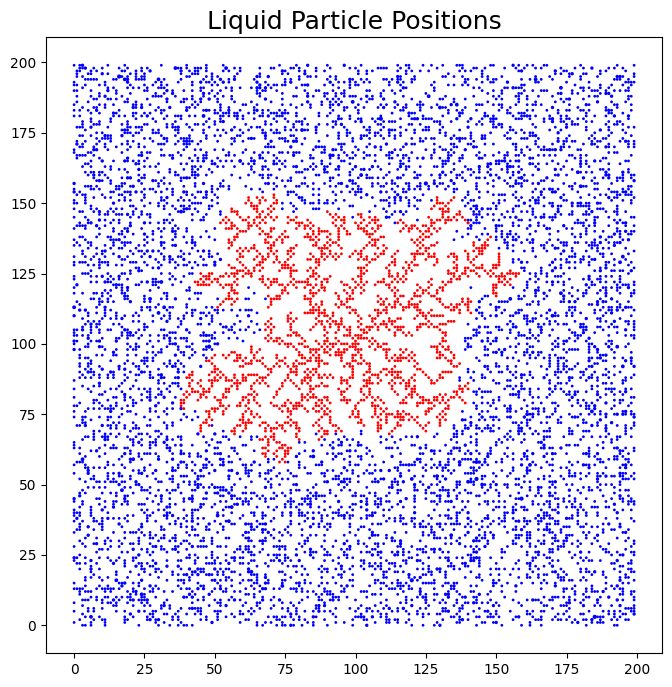

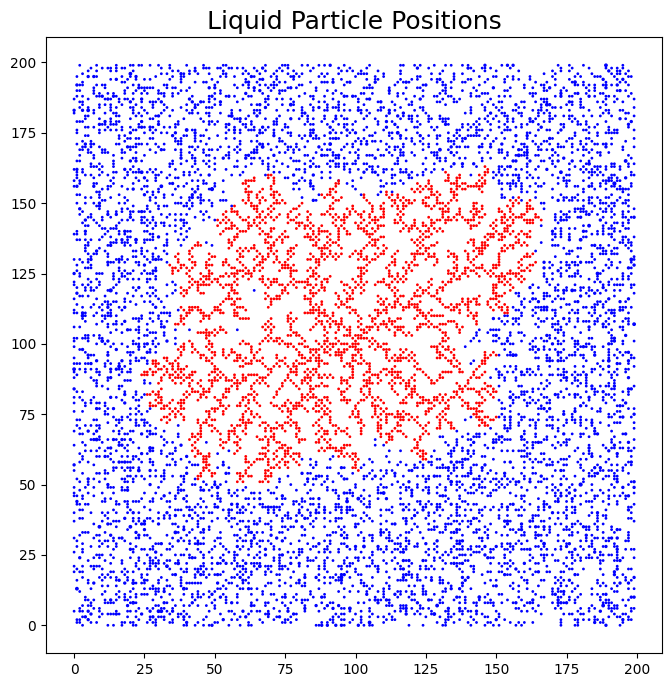

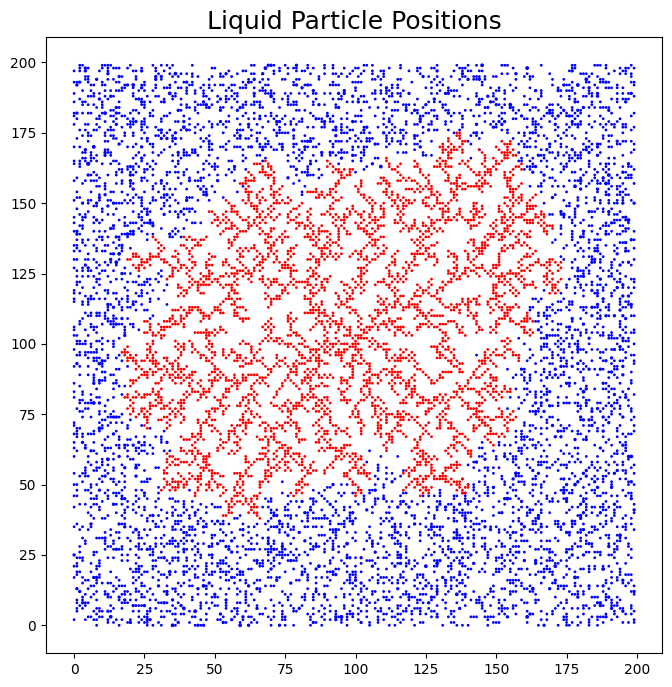

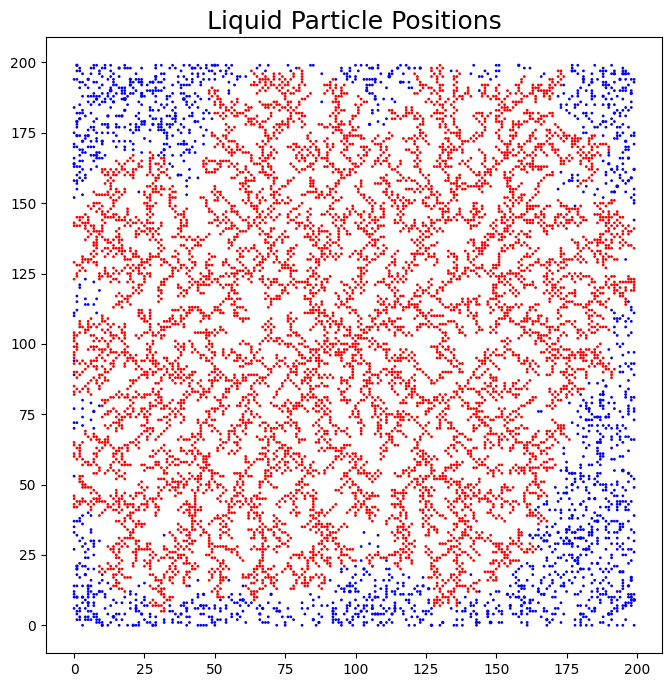

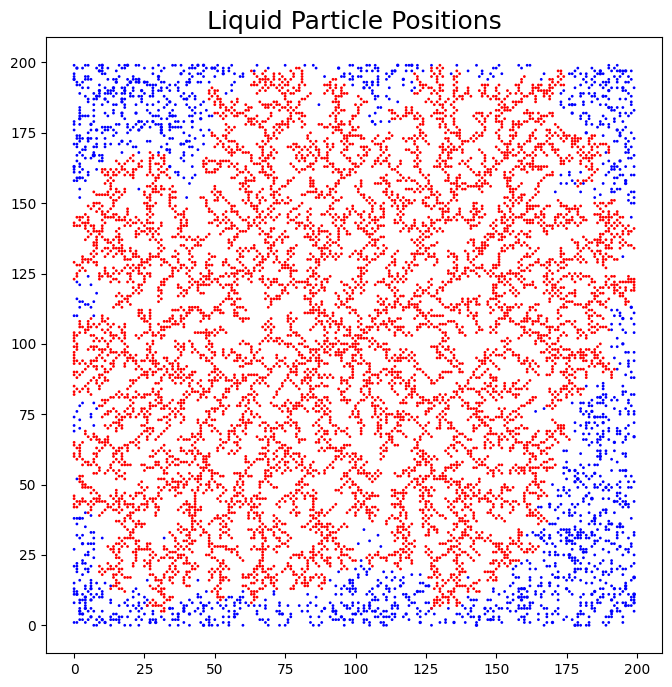

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Create n x n array of liquid particles
liq_pos = np.zeros((200,200), dtype=int)
for n in range(10000):
    i = random.randint(0,199)
    j = random.randint(0,199)
    val = 1
    liq_pos[i,j] = liq_pos[i,j] + val

# Create n x n array of solid particles
solid_pos = np.zeros((200,200), dtype=int)
solid_pos[100,100] = 1
solid_pos[99,100] = 1
solid_pos[100,99] = 1
solid_pos[99,99] = 1
solid_pos[101,100] = 1
solid_pos[100,101] = 1

def plot_pos(liq_pos, solid_pos):
    rows, cols = liq_pos.shape
    x_positions = np.arange(0, cols) 
    y_positions = np.arange(0, rows)  
    x_grid, y_grid = np.meshgrid(x_positions, y_positions)

    plt.figure(figsize=(8, 8))
    plt.scatter(x_grid, y_grid, s=liq_pos, c='b', marker='o')
    plt.scatter(x_grid, y_grid, s=solid_pos, c='r', marker='o')
    plt.title('Liquid Particle Positions', fontsize=18)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Initial liquid positions and starting crystal
plot_pos(liq_pos, solid_pos)

total_liq_particles = np.sum(liq_pos)
counter = 0 
t = 0
time_steps = []
n_solid = []

while counter != 1:
    t += 1
    time_steps.append(t)
    
    n_solid.append(np.sum(solid_pos))

    # Create temporary array that creates a boundary around all available adjacent positions of solid array
    # Chat GPT helped with this part

    rows, cols = solid_pos.shape
    solid_temp = np.zeros((rows, cols)) 
    adjacent_positions = [(i, j) for i in range(-1, 2) for j in range(-1, 2)] 

    for i in range(rows):
        for j in range(cols):
            if solid_pos[i, j] == 1:
                solid_temp[i, j] = 1
    
                for dx, dy in adjacent_positions:
                    if 0 <= i + dx < rows and 0 <= j + dy < cols:
                        solid_temp[i + dx, j + dy] = 1


    # Find the common indices between liquid array and temporary solid array
    common_indices = np.where((liq_pos != 0) & (solid_temp != 0))

    # Turn liquids to solids, and note location in solid array
    liq_pos[common_indices] = 0
    solid_pos[common_indices] = 1

    # Randomly move liquid particles to adjacent position
    indices = np.where(liq_pos>=1)
    vals = liq_pos[indices]
    i_idx = indices[0]
    j_idx = indices[1]

    for val_pos, val in enumerate(vals):
        new_i_indices_arr = np.zeros(val, dtype=int)
        new_j_indices_arr = np.zeros(val, dtype=int)

        for num_vals in range(val):
            i_new = i_idx[val_pos] + random.randint(-1,1)
            j_new = j_idx[val_pos] + random.randint(-1,1)
            new_i_indices_arr[num_vals] = i_new
            new_j_indices_arr[num_vals] = j_new

        i_idx[val_pos] = new_i_indices_arr[0]
        j_idx[val_pos] = new_j_indices_arr[0]
        vals[val_pos] = 1

        # This is in case there are multiple liquid particles in one position
        if val > 1:
            for num_vals in range(1,val):
                i_idx = np.append(i_idx,new_i_indices_arr[num_vals])
                j_idx = np.append(j_idx,new_j_indices_arr[num_vals])
                vals = np.append(vals,1)
    
    # Boundary conditions
    i_idx[i_idx>=200] = 0
    j_idx[j_idx>=200] = 0
    i_idx[i_idx<=-1] = 199
    j_idx[j_idx<=-1] = 199

    # Recreate liquid array with new positions
    liq_pos = np.zeros((200,200), dtype=int)
    for n in range(len(vals)):
        liq_pos[i_idx[n],j_idx[n]] = liq_pos[i_idx[n],j_idx[n]] + vals[n] 
    
    # Plot growth at multiple time intervals
    if np.sum(liq_pos) % 1000 < 20:
        plot_pos(liq_pos, solid_pos)

    # Exit loop once only 20% of liquid particles remain
    if np.sum(liq_pos) <= total_liq_particles * 0.20:
        counter = 1
        
plot_pos(liq_pos, solid_pos)




# (b)

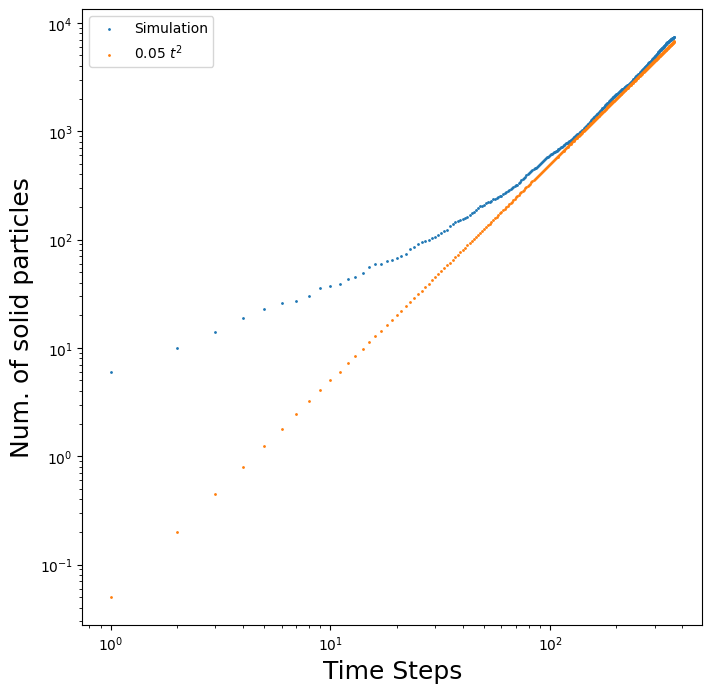

In [146]:
plt.figure(figsize=(8, 8))
plt.scatter(time_steps, n_solid, s=1, label='Simulation')
plt.yscale('log')
plt.xscale('log')
plt.scatter(time_steps, 0.05*np.square(time_steps), s=1, label='0.05 $t^2$')
plt.xlabel('Time Steps', fontsize=18)
plt.ylabel('Num. of solid particles',fontsize=18)
plt.legend()
plt.show()

# We can see that the number of solid particles grows in proportion to number of time steps squared. This makes sense because the liquid particles move in a random walk, where distance traveled goes as $\sqrt{num. \; time \;steps}$. I think of this as a bifurcation process. For each new solid particle, there is a new solidification point for a liquid particle to latch on too, so we get this branching effect that we can see in the crystal growth plots. More surface area means more growth, so it grows as a power law. 

# 2. Ising Model

# (a)

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import random

def MarkovChain(kBT, steps, n):

    # n is array size, steps is iteration number

    # Start counter at zero
    count = 0
    M = np.zeros(steps)

    # Randomly generate array |(n,n) of spins so that average is ~ zero

 
    spin_vals = np.random.choice([-1,1], (n,n)) 

    while count < steps:
        # Find random position to change spin 
        rand_row = np.random.randint(0, n)
        rand_col = np.random.randint(0, n)

        # Calculate change in energy
        if rand_row + 1 >= n:
            s_below = spin_vals[0, rand_col] 
        else: 
            s_below = spin_vals[rand_row + 1, rand_col]

        if rand_row - 1 < 0:
            s_above = spin_vals[n - 1, rand_col] 
        else: 
            s_above = spin_vals[rand_row - 1, rand_col] 

        if rand_col + 1 >= n:
            s_right = spin_vals[rand_row, 0] 
        else: 
            s_right = spin_vals[rand_row, rand_col + 1] 

        if rand_col - 1 < 0:
            s_left = spin_vals[rand_row, n - 1] 
        else: 
            s_left = spin_vals[rand_row, rand_col - 1] 

        s_i = spin_vals[rand_row, rand_col]
        deltaE = 2 * s_i * (s_above + s_below + s_right + s_left)
        
        #Calculate acceptance probability of new move
        # If accepted, change spin of one position
        if random.random() < np.exp(-deltaE/kBT):
            spin_vals[rand_row, rand_col] = -spin_vals[rand_row, rand_col]

        # Measure current value of M
        dM = np.sum(spin_vals)
        M[count] = dM

        # Increase step count
        count += 1

    # After many steps calculate average M
    M_avg = np.average(M)

    return M
 



# (b)

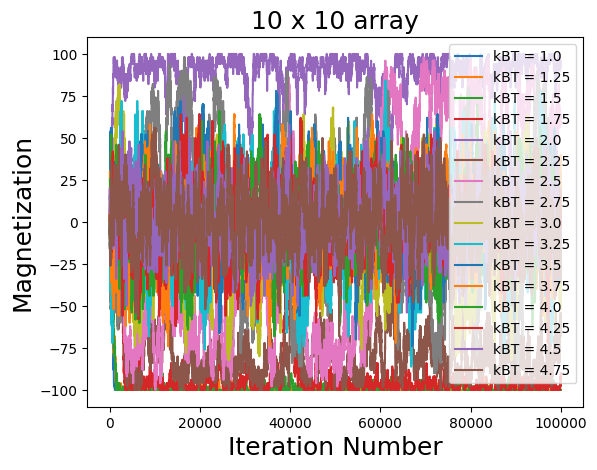

In [150]:

kBT_arr = np.arange(1,5,0.25)

steps = 100000
array_size = 10

M_mean = []
M_var = []

for kBT in kBT_arr:
    M = MarkovChain(kBT, steps, array_size)
    M_mean.append(np.mean(M))
    M_var.append(np.var(M))
    plt.plot(MarkovChain(kBT, steps, array_size), label='kBT = {}'.format(kBT))
plt.xlabel('Iteration Number', fontsize=18)
plt.ylabel('Magnetization', fontsize=18)
plt.title('{0} x {0} array'.format(array_size), fontsize=18)
plt.legend()
plt.show()

# We can see a burn in phase for the lower temperatures, which makes sense because higher temperature systems are going to take longer to settle down to a Boltzmann distribution. The higher temperatures will accept a higher fraction of energy changes, meaning the Metropolis Hasting algorithm won't settle down to a consistent value as quickly as a lower temperature system, where the number of accepted moves is smaller. The low temps favor a magnetization of 100 or -100, which makes sense, because I would expect a magnetic material to be able to converge to two different equal but opposite magnetizations if it starts with a random magnetization state. 

# (c)

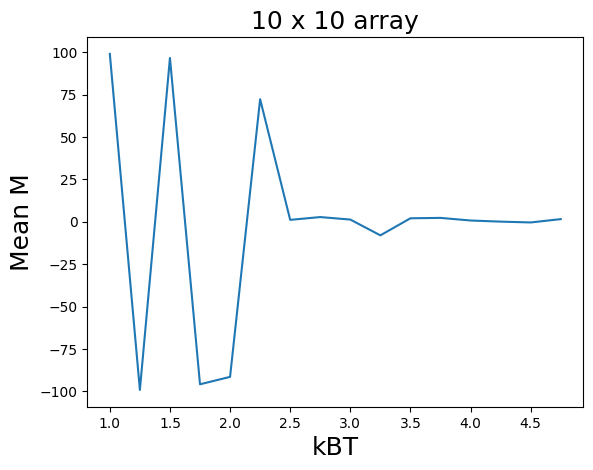

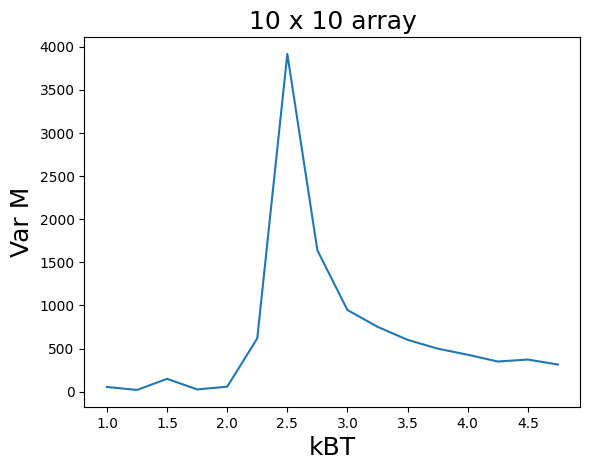

In [151]:
plt.plot(kBT_arr, M_mean)
plt.xlabel('kBT', fontsize=18)
plt.ylabel('Mean M', fontsize=18)
plt.title('{0} x {0} array'.format(array_size), fontsize=18)
plt.show()

plt.plot(kBT_arr, M_var)
plt.xlabel('kBT', fontsize=18)
plt.ylabel('Var M', fontsize=18)
plt.title('{0} x {0} array'.format(array_size), fontsize=18)
plt.show()

# There is definitely a large fluctuation in the mean magnetization and its variance. The mean settles jumps around between -100 and 100 then tends towards zero at higher temperatures. The variance is relatively constant for low temps, where convergence occurs, then spikes, and falls again when there is no convergence. 